# Step 1: Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('online_retail.csv', encoding='ISO-8859-1')
# default pandas encoding (UTF-8) results to 'UnicodeDecodeError'
# so we use 'ISO-8859-1' encoding instead
# it happens because the CSV file contains characters that cant be encoded using UTF-8

# Step 2: Check basic info of the dataset

In [3]:
# check how the dataset looks like
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
# get the info about the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# get info of numerical columns
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
# check missing value count on each column
missing_values = df.isnull().sum()
print(missing_values)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


# Step 3: Data pre-processing

## 1. Handling data with non-positive Quantity or UnitPrice values

In [7]:
# check how many non-positive value
# Quantity <= 0
zero_or_negative_quantity_count = df[df['Quantity'] <= 0].shape[0]
print(f"Number of rows with non-positive Quantity value: {zero_or_negative_quantity_count}")

# UnitPrice <=0
zero_or_negative_unitprice_count = df[df['UnitPrice'] <= 0].shape[0]
print(f"Number of rows with non-positive UnitPrice: {zero_or_negative_unitprice_count}")

# At least Quantity or UnitPrice <= 0
both_count = df[(df['Quantity'] <= 0) | (df['UnitPrice'] <= 0)].shape[0]
print(f"Number of rows with one or both non-positive Quantity and UnitPrice value: {both_count}")

Number of rows with non-positive Quantity value: 10624
Number of rows with non-positive UnitPrice: 2517
Number of rows with one or both non-positive Quantity and UnitPrice value: 11805


**Solution:** The problematic data only makes up about 2% of the entire dataset. So, the solution is to just remove that data.

In [8]:
# remove the non-positive value by taking only positive data
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# show dataset info after removal
print("Dataset info update:")
df.describe()

Dataset info update:


,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## 2. Handling Description ambiguity for every StockCode

Each StockCode should represent an unique Description. So we need to check whether there is any ambiguity in the StockCode and Description

In [9]:
# group Description to StockCode
stockcode_description_mapping = df.groupby('StockCode')['Description'].unique()

# get StockCode with ambiguity Description
ambiguous_stockcodes = stockcode_description_mapping[stockcode_description_mapping.apply(len) > 1]

# count of ambiguous stockcode
number_of_ambiguous_stockcode = len(ambiguous_stockcodes)
print(f"Number of ambiguous StockCodes: {number_of_ambiguous_stockcode}")

# show the ambiguous StockCode
for stockcode, descriptions in ambiguous_stockcodes.items():
    print(f"StockCode: {stockcode}, Descriptions: {descriptions}")

Number of ambiguous StockCodes: 220
StockCode: 16156L, Descriptions: ['WRAP, CAROUSEL' 'WRAP CAROUSEL']
StockCode: 17107D, Descriptions: ["FLOWER FAIRY,5 SUMMER B'DRAW LINERS" 'FLOWER FAIRY 5 DRAWER LINERS'
 'FLOWER FAIRY 5 SUMMER DRAW LINERS']
StockCode: 20622, Descriptions: ['VIPPASSPORT COVER ' 'VIP PASSPORT COVER ']
StockCode: 20725, Descriptions: ['LUNCH BAG RED RETROSPOT' 'LUNCH BAG RED SPOTTY']
StockCode: 20914, Descriptions: ['SET/5 RED RETROSPOT LID GLASS BOWLS' 'SET/5 RED SPOTTY LID GLASS BOWLS']
StockCode: 21109, Descriptions: ['LARGE CAKE TOWEL, CHOCOLATE SPOTS' 'LARGE CAKE TOWEL CHOCOLATE SPOTS']
StockCode: 21112, Descriptions: ['SWISS ROLL TOWEL, PINK  SPOTS' 'SWISS ROLL TOWEL PINK  SPOTS']
StockCode: 21175, Descriptions: ['GIN + TONIC DIET METAL SIGN' 'GIN AND TONIC DIET METAL SIGN']
StockCode: 21232, Descriptions: ['STRAWBERRY CERAMIC TRINKET BOX' 'STRAWBERRY CERAMIC TRINKET POT']
StockCode: 21243, Descriptions: ['PINK  POLKADOT PLATE ' 'PINK POLKADOT PLATE ']
StockCode

**Solution:** 
From the results above, we can see ambiguity in the StockCode and Description. Ambiguity may occur due to typos or inconsistent naming, but it appears that they represent the same product. Therefore, the solution is to take only one Description.

In [10]:
# create a dictionary
stockcode_description_mapping = {}

# find the min of len for every stockcode that has ambiguous description then add to dictionary
for stockcode, descriptions in ambiguous_stockcodes.items():
    min_length_description = min(descriptions, key=len)    
    stockcode_description_mapping[stockcode] = min_length_description

# change the Description based on the dictionary
df['Description'] = df.apply(lambda row: stockcode_description_mapping.get(row['StockCode'], row['Description']), axis=1)

# check ambiguity again
stockcode_description_mapping = df.groupby('StockCode')['Description'].unique()
ambiguous_stockcodes = stockcode_description_mapping[stockcode_description_mapping.apply(len) > 1]
number_of_ambiguous_stockcode = len(ambiguous_stockcodes)
print(f"Number of ambiguous StockCodes: {number_of_ambiguous_stockcode}")

Number of ambiguous StockCodes: 0


## 3. Converting InvoiceDate Dtype

In [11]:
# change InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

# show info after change
df['InvoiceDate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 530104 entries, 0 to 541908
Series name: InvoiceDate
Non-Null Count   Dtype         
--------------   -----         
530104 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 8.1 MB


### Pre-processed Data Info

In [12]:
print("Dataset info after preprocessing")
df.info()

print("View 10 random rows after preprocessing")
df_random_view = df.sample(10)
df_random_view

Dataset info after preprocessing
<class 'pandas.core.frame.DataFrame'>
Int64Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    530104 non-null  object        
 1   StockCode    530104 non-null  object        
 2   Description  530104 non-null  object        
 3   Quantity     530104 non-null  int64         
 4   InvoiceDate  530104 non-null  datetime64[ns]
 5   UnitPrice    530104 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      530104 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.4+ MB
View 10 random rows after preprocessing


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
100162,544806,84832,ZINC WILLIE WINKIE CANDLE STICK,12,2011-02-23 14:50:00,0.85,15932.0,United Kingdom
454632,575589,23367,SET 12 COLOUR PENCILS SPACEBOY,16,2011-11-10 12:05:00,0.65,14262.0,United Kingdom
300721,563211,48194,DOORMAT HEARTS,2,2011-08-14 12:33:00,7.95,17049.0,United Kingdom
319934,564943,22654,DELUXE SEWING KIT,2,2011-08-31 13:23:00,5.95,17706.0,United Kingdom
385869,570218,23360,SET 8 CANDLES VINTAGE DOILY,12,2011-10-09 12:20:00,1.95,16873.0,United Kingdom
256848,559506,22585,PACK OF 6 BIRDY GIFT TAGS,1,2011-07-08 15:17:00,2.46,NaN,United Kingdom
270212,560552,16225,RATTLE SNAKE EGGS,3,2011-07-19 12:54:00,1.25,15311.0,United Kingdom
109195,545587,37423,WHITE WITH BLACK CATS PLATE,6,2011-03-04 09:46:00,0.85,14796.0,United Kingdom
217146,555896,21877,HOME SWEET HOME MUG,6,2011-06-07 16:04:00,1.25,15640.0,United Kingdom
496847,578347,22745,POPPY'S PLAYHOUSE BEDROOM,2,2011-11-24 09:26:00,4.13,NaN,United Kingdom


# Step 4: Data Analysis

## 1. Sales Analysis

### Average Gross Sales by Day

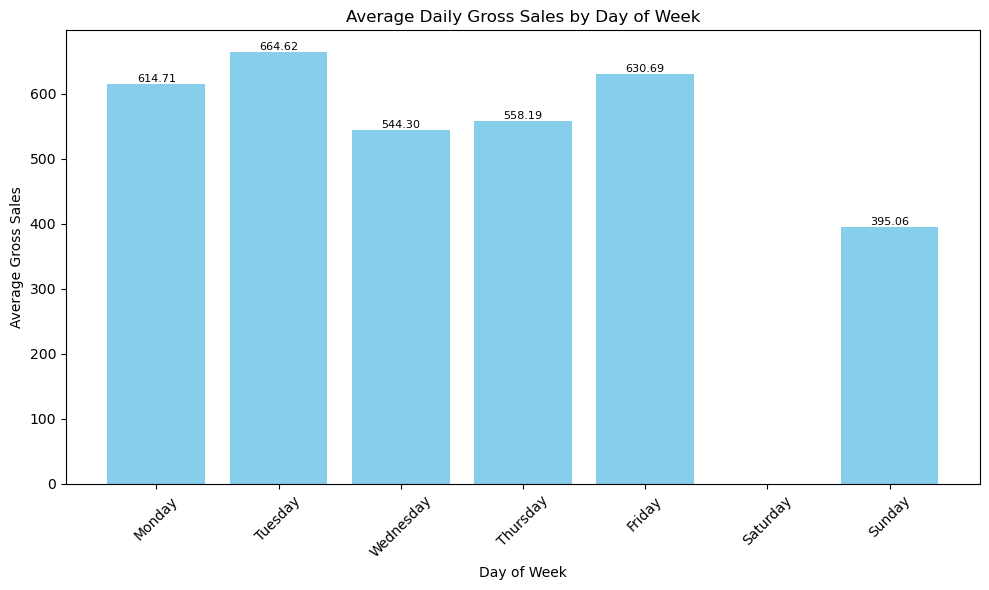

In [13]:
# calculate total sales (Gross Sales) and add a new column
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

# create new column for day's name
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# calculate average
daily_total_sales = df.groupby(['InvoiceDate', 'DayOfWeek'])['TotalSales'].sum().reset_index()
average_daily_gross_sales = daily_total_sales.groupby('DayOfWeek')['TotalSales'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# visualization
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(average_daily_gross_sales.index, average_daily_gross_sales, color='skyblue')

# add labels
ax.bar_label(bars, fmt='%.2f', label_type='edge', fontsize=8)

plt.title('Average Daily Gross Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Gross Sales')
plt.xticks(rotation=45)
plt.tight_layout()  # Ensures labels fit properly
plt.show()

### Number of Items Sold each Month

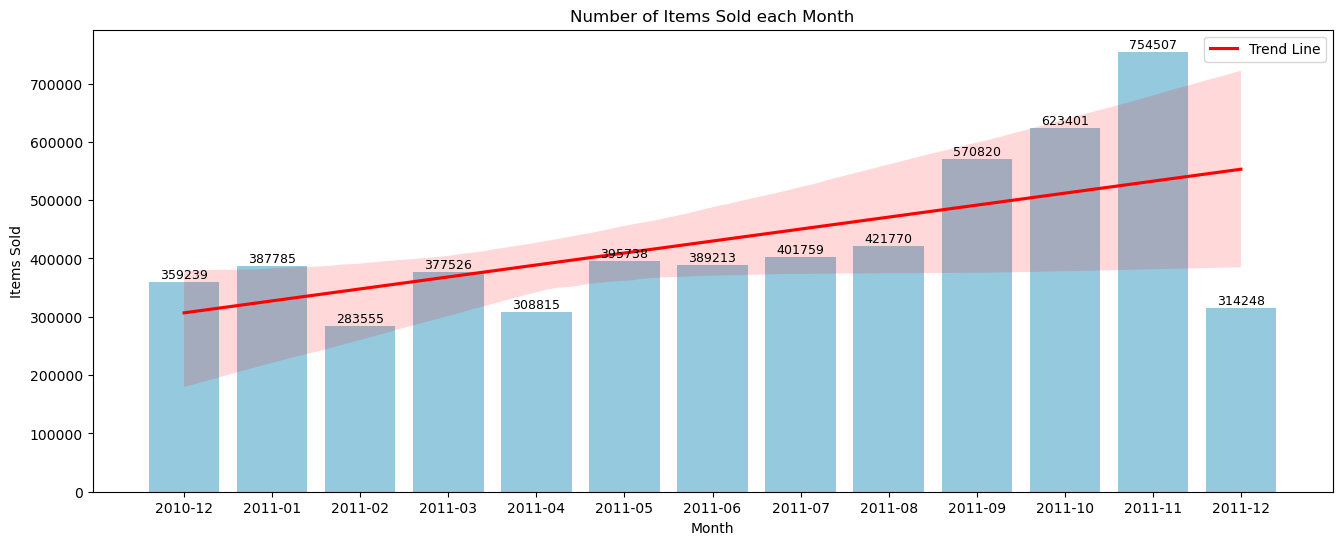

In [14]:
# create new column
df['Month'] = df['InvoiceDate'].dt.to_period('M')

# calculate quantity groupby month
monthly_quantity = df.groupby('Month')['Quantity'].sum()

# visualization
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=monthly_quantity.index.astype(str), y=monthly_quantity.values, color='skyblue')
plt.title('Number of Items Sold each Month')
plt.xlabel('Month')
plt.ylabel('Items Sold')

# add trend line
x_values = np.arange(len(monthly_quantity))  # Create an array of indices
sns.regplot(x=x_values, y=monthly_quantity.values, ax=ax, color='red', scatter=False, label='Trend Line')

# add labels
for i, value in enumerate(monthly_quantity.values):
    plt.text(i, value + 1000, str(value), ha='center', va='bottom', fontsize=9, color='black')

plt.legend()
plt.show()

### Monthly Gross Sales

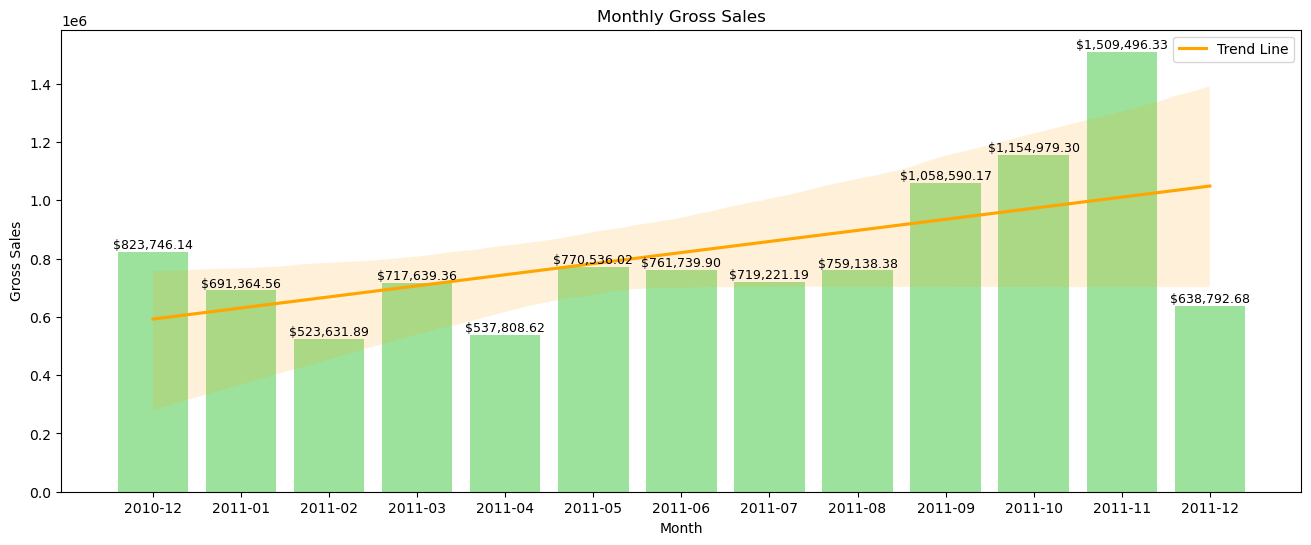

In [15]:
# groupby month
monthly_sales = df.groupby('Month')['TotalSales'].sum()

# visualization
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, color='lightgreen')
plt.title('Monthly Gross Sales')
plt.xlabel('Month')
plt.ylabel('Gross Sales')

x_values = np.arange(len(monthly_sales))
sns.regplot(x=x_values, y=monthly_sales.values, ax=ax, color='orange', scatter=False, label='Trend Line')

for i, value in enumerate(monthly_sales.values):
    plt.text(i, value + 1000, f"${value:,.2f}", ha='center', va='bottom', fontsize=9, color='black')

plt.legend()
plt.show()

# 2. Products Analysis

### 'Special' Months Product Analysis (Sept - Nov 2011)

We can see sales greatly increased in the months of September until November 2011. let's check **what products experienced a high sales in these months?**.

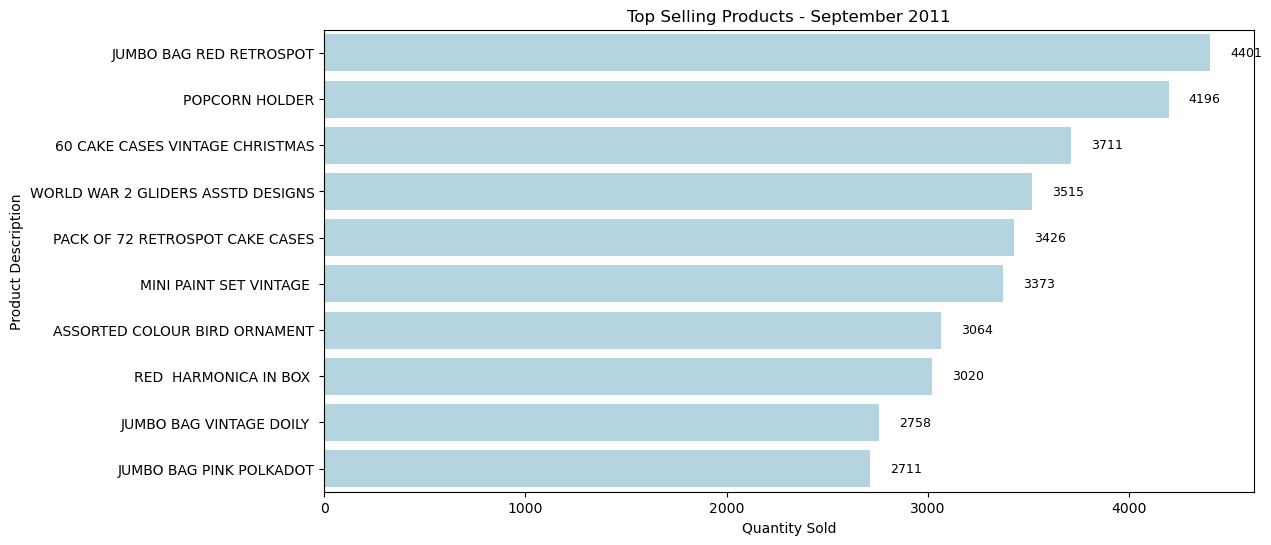

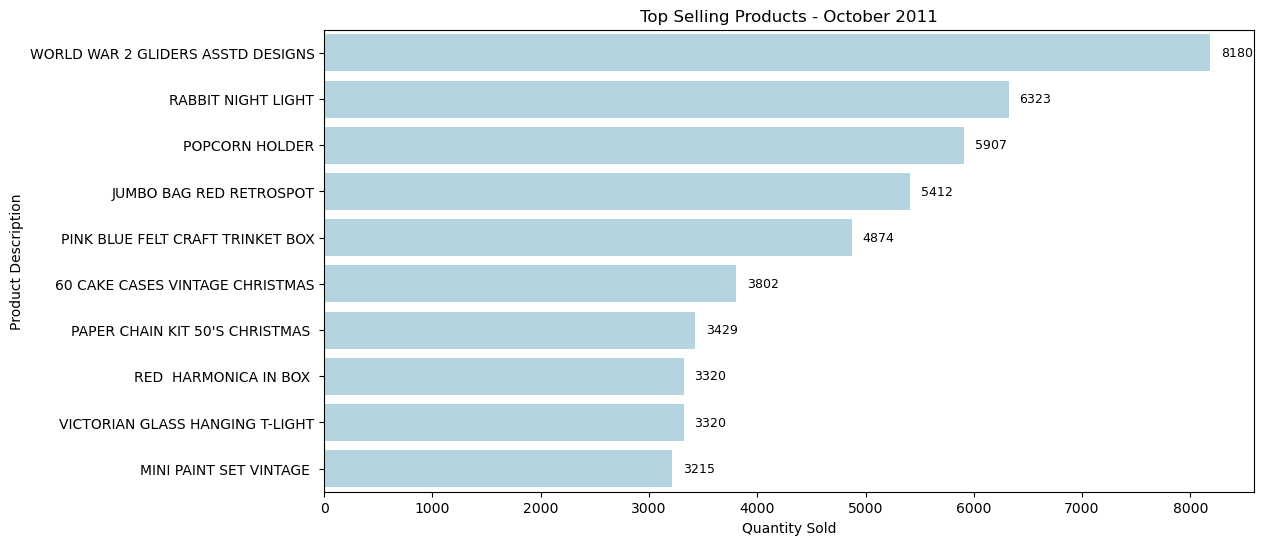

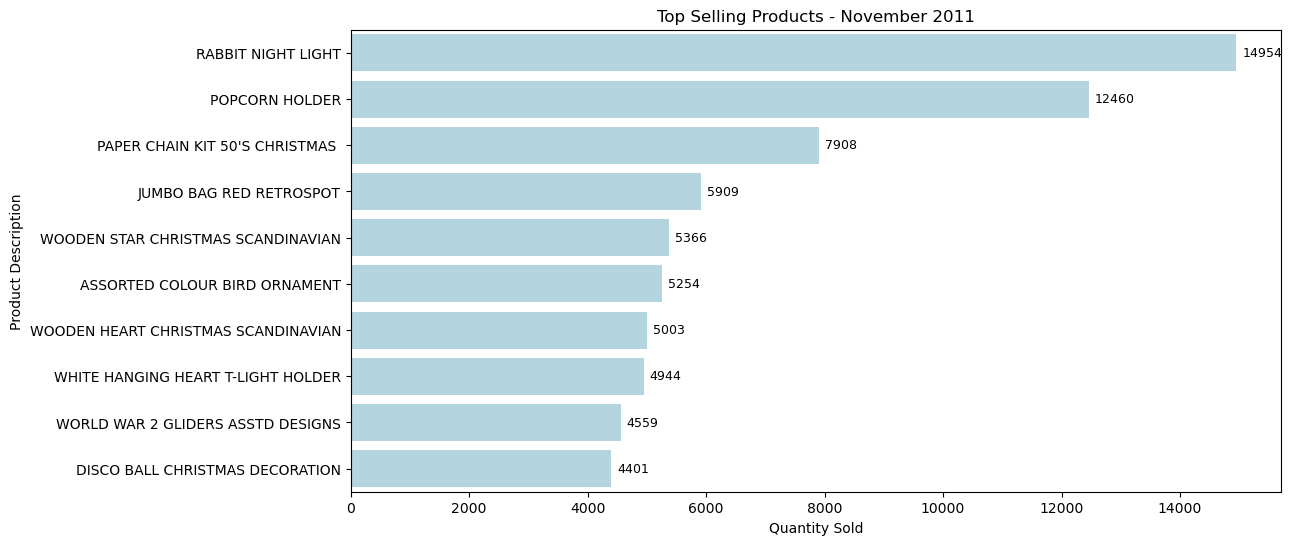

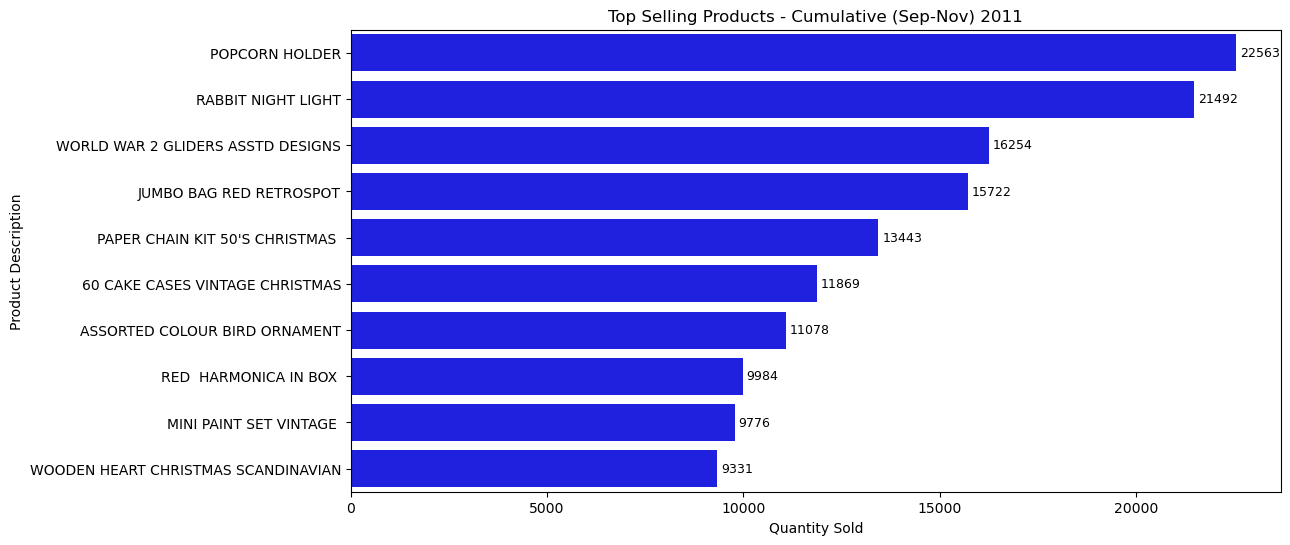

In [16]:
# Filter data for each month
df_sep = df[df['Month'] == '2011-09']
df_oct = df[df['Month'] == '2011-10']
df_nov = df[df['Month'] == '2011-11']

# Concatenate data for the three months
df_combined = pd.concat([df_sep, df_oct, df_nov])

# Function to plot top products for a specific month
def plot_top_products(data, month, color):
    # Calculate quantity sold per product based on description
    product_sales = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

    # Select the top N products
    top_products = product_sales.head(10)

    # Visualize top-selling products based on description
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_products.values, y=top_products.index, color=color)
    plt.title(f'Top Selling Products - {month}')
    plt.xlabel('Quantity Sold')
    plt.ylabel('Product Description')

    # add labels
    for i, value in enumerate(top_products.values):
        plt.text(value + 100, i, str(value), ha='left', va='center', fontsize=9, color='black')

    plt.show()

# September
plot_top_products(df_sep, 'September 2011', color='lightblue')

# October
plot_top_products(df_oct, 'October 2011', color='lightblue')

# November
plot_top_products(df_nov, 'November 2011', color='lightblue')

# cumulative 
plot_top_products(df_combined, 'Cumulative (Sep-Nov) 2011', color='blue')

### Most Purchased Items All the Time

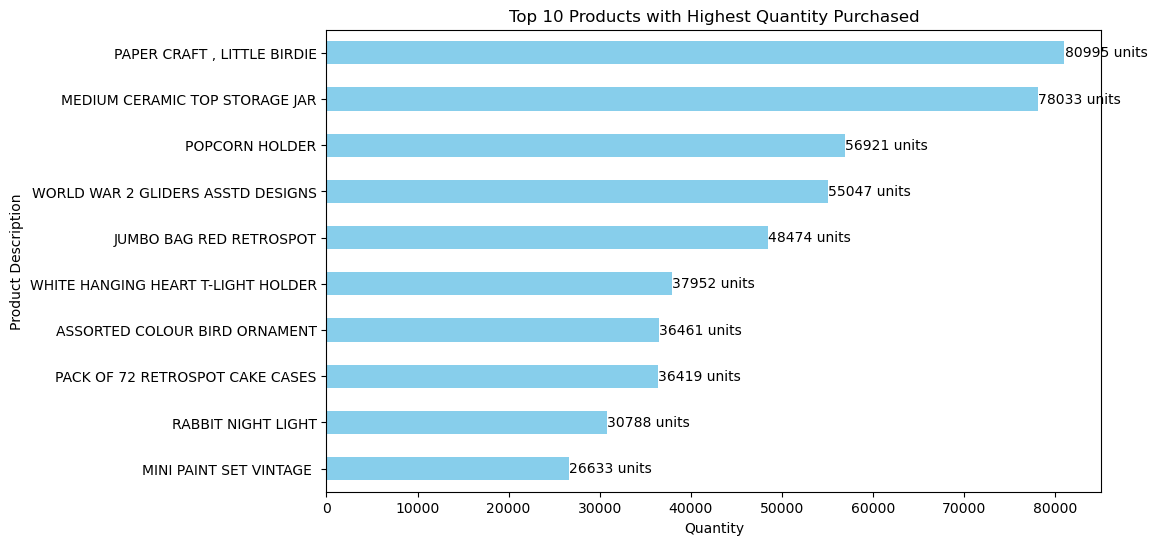

In [17]:
# group Quantity by Description
product_quantity = df.groupby('Description')['Quantity'].sum()

# select top 10 products
top_10_products = product_quantity.nlargest(10)

# visualization
plt.figure(figsize=(10, 6))
ax = top_10_products.sort_values().plot(kind='barh', color='skyblue')
plt.title('Top 10 Products with Highest Quantity Purchased')
plt.xlabel('Quantity')
plt.ylabel('Product Description')

# add labels
for i, v in enumerate(top_10_products.sort_values()):
    plt.text(v + 3, i, f'{v} units', color='black', va='center')

plt.show()

###  Top 10 Products with Highest Total Sales

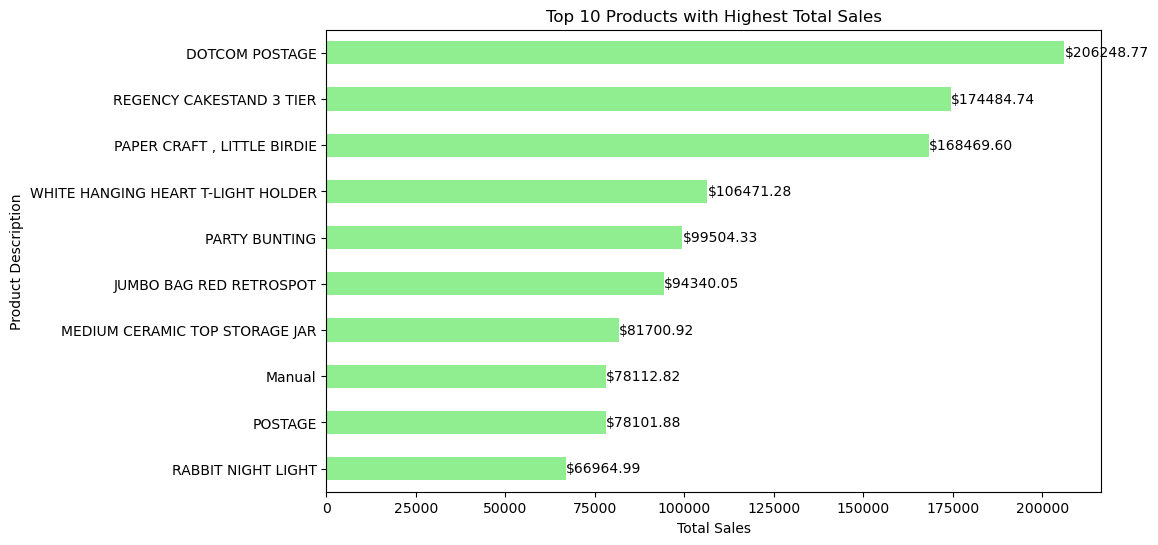

In [18]:
# same like before, but now the TotalSales
product_sales = df.groupby('Description')['TotalSales'].sum()

top_10_products_sales = product_sales.nlargest(10)

plt.figure(figsize=(10, 6))
ax = top_10_products_sales.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Products with Highest Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')

for i, v in enumerate(top_10_products_sales.sort_values()):
    plt.text(v + 3, i, f'${v:.2f}', color='black', va='center')

plt.show()

## 3. Customer Analysis

### 10 Most Loyal Customer

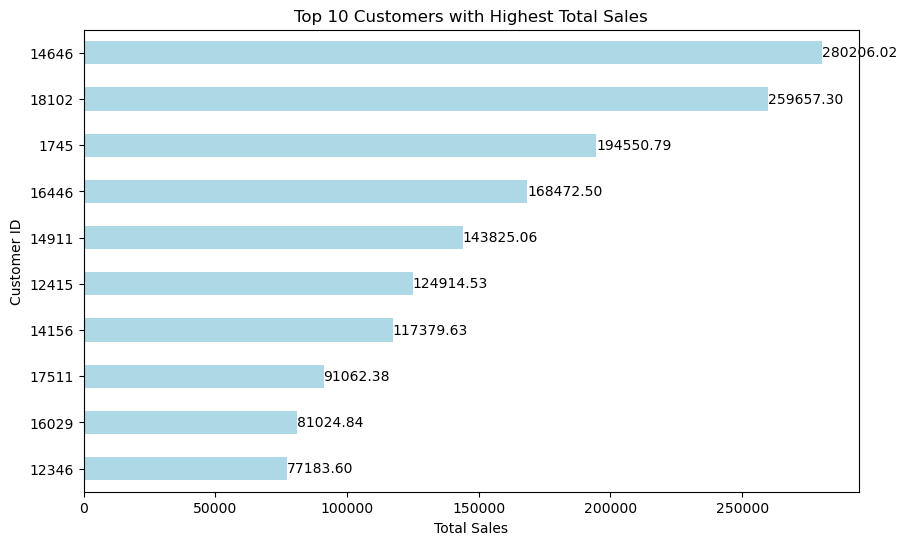

In [19]:
# create new dataframe, copy all rows that the CustomerID value isnt missing
df_filtered = df.dropna(subset=['CustomerID']).copy()
df_filtered['CustomerID'] = df_filtered['CustomerID'].astype(str).str.rstrip('.0')

# just like before
customer_sales = df_filtered.groupby('CustomerID')['TotalSales'].sum()
top_10_customers_sales = customer_sales.nlargest(10)

plt.figure(figsize=(10, 6))
ax = top_10_customers_sales.sort_values().plot(kind='barh', color='lightblue')
plt.title('Top 10 Customers with Highest Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Customer ID')

for i, v in enumerate(top_10_customers_sales.sort_values()):
    plt.text(v + 3, i, f'{v:.2f}', color='black', va='center')

plt.show()

### Top 10 Country with Highest Sales

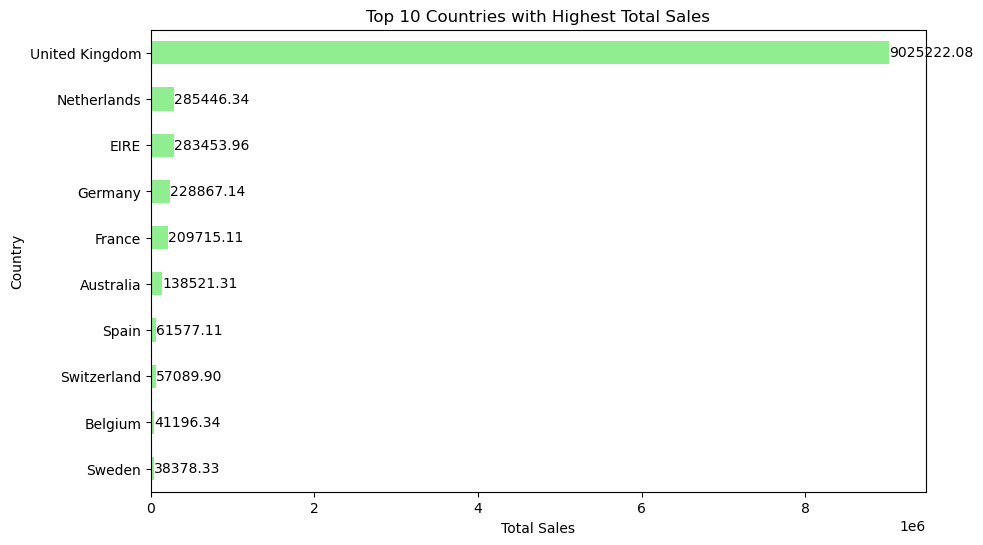

In [20]:
# based on Country
country_sales = df.groupby('Country')['TotalSales'].sum()
top_10_countries_sales = country_sales.nlargest(10)

plt.figure(figsize=(10, 6))
ax = top_10_countries_sales.sort_values().plot(kind='barh', color='lightgreen')
plt.title('Top 10 Countries with Highest Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Country')

for i, v in enumerate(top_10_countries_sales.sort_values()):
    plt.text(v + 3, i, f'{v:.2f}', color='black', va='center')

plt.show()